# Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/processed/cleaned_data.csv")

# Numerical variables (continuous or discrete without inherent order)
numerical_vars = ['StudyTimeWeekly', 'Absences', 'GPA']

# Categorical variables (nominal, no inherent order)
categorical_vars = ['Gender', 'Ethnicity', 'Tutoring', 'Extracurricular', 
                    'Sports', 'Music', 'Volunteering']

# Ordinal variables (categorical with a natural order)
ordinal_vars = ['Age', 'ParentalEducation', 'ParentalSupport', 'GradeClass']

# Create separate DataFrames for numerical, categorical, and ordinal variables
num_df = data[numerical_vars].copy()
cat_df = data[categorical_vars].copy()
ord_df = data[ordinal_vars].copy()

## Univariate Analysis

### - Numerical Variables

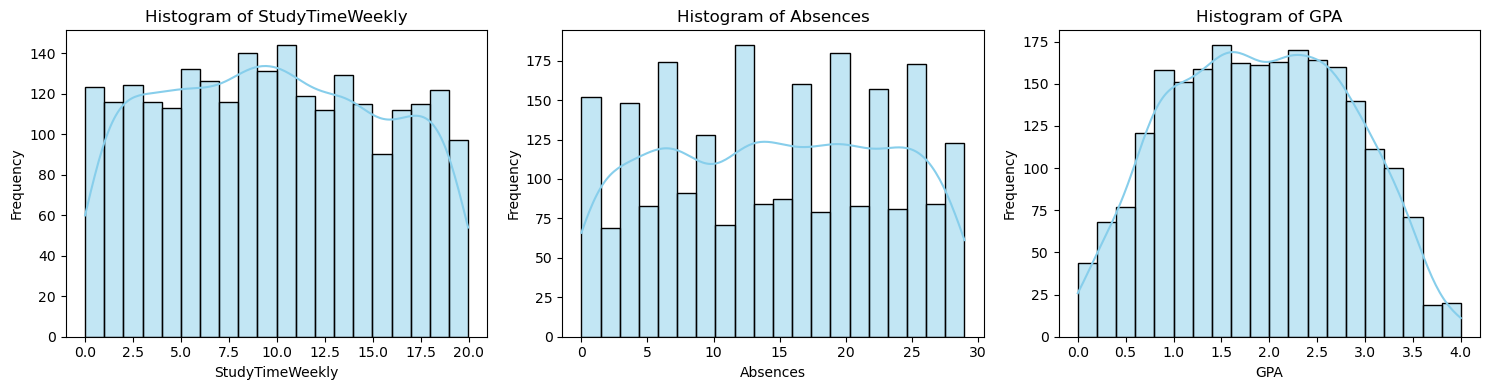

In [4]:
num_cols = num_df.columns.tolist()

# Determine grid size based on the number of variables (here 5 variables)
# We'll use 2 rows and 3 columns (6 subplots) and remove the unused subplot.
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Loop over each numerical variable to create a histogram with KDE
for i, col in enumerate(num_cols):
    sns.histplot(num_df[col], kde=True, bins=20, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove any extra subplots (if there are any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### - Catagorical Variables

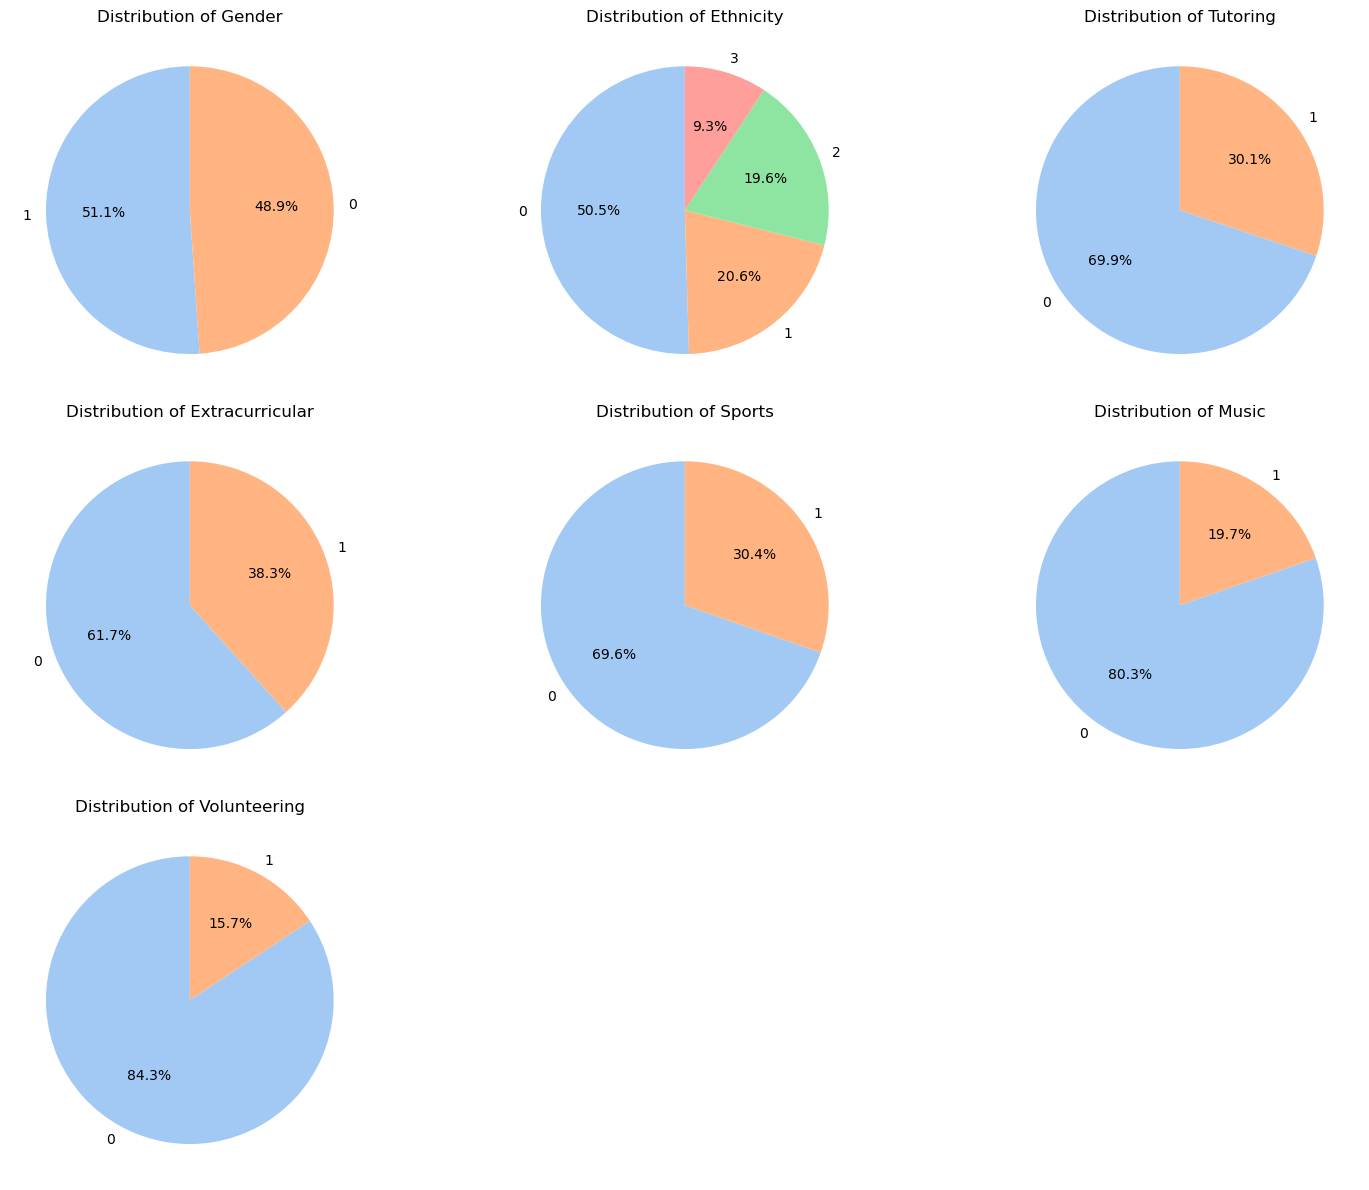

In [5]:
import matplotlib.pyplot as plt

# List of categorical variable names from the cat_df DataFrame
cat_cols = cat_df.columns.tolist()

# Determine grid size based on the number of variables (7 categorical variables in cat_df)
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Loop over each categorical variable to create a pie chart
for i, col in enumerate(cat_cols):
    ax = axes[i]
    # Calculate the counts of each category
    counts = cat_df[col].value_counts()
    # Create a pie chart
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(counts)), startangle=90)
    ax.set_title(f"Distribution of {col}")

# Remove any extra subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### - Ordinal Variables

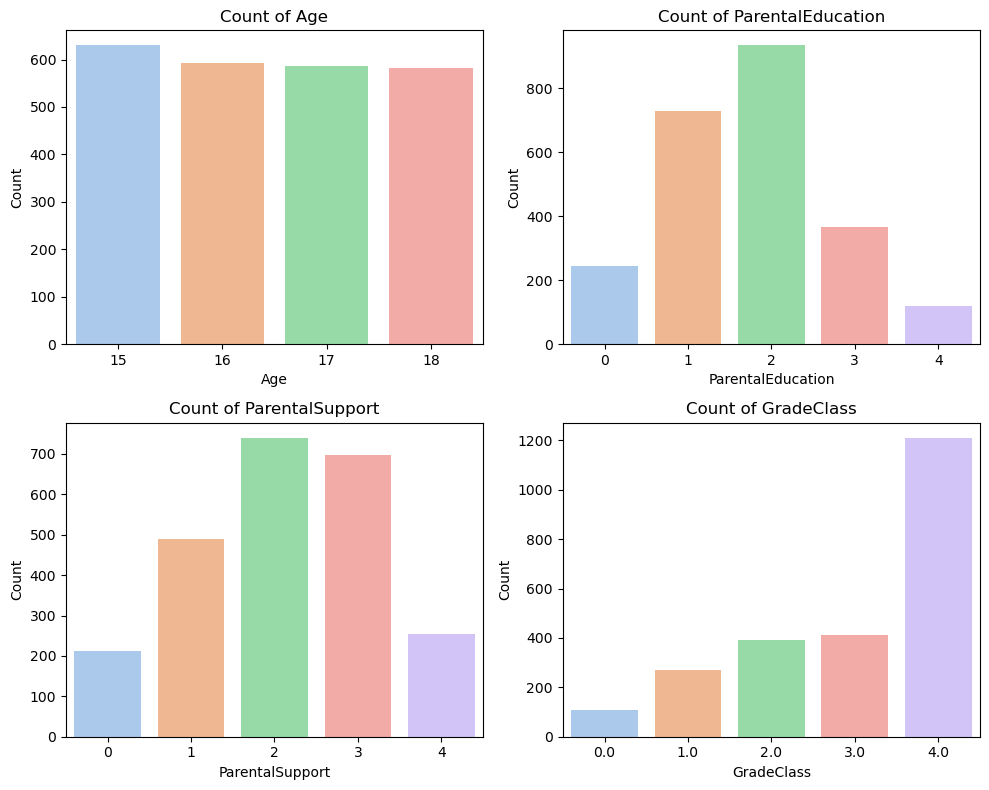

In [6]:
# List of categorical variable names from the cat_df DataFrame
ord_cols = ord_df.columns.tolist()

# Determine grid size based on the number of variables (here there are 10 categorical variables)
n_cols = 2
n_rows = (len(ord_cols) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Loop over each categorical variable to create a bar plot
for i, col in enumerate(ord_cols):
    ax = axes[i]
    # Assign the same variable to both x and hue and disable the legend for the same effect
    sns.countplot(x=ord_df[col], hue=ord_df[col], palette='pastel', dodge=False, ax=ax)
    # Remove the legend to avoid redundancy (legend removal is safe if legend exists)
    if ax.get_legend():
        ax.get_legend().remove()
    ax.set_title(f"Count of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

# Remove any extra subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Bivariate Analysis

### - Numerical Features vs GradeClass

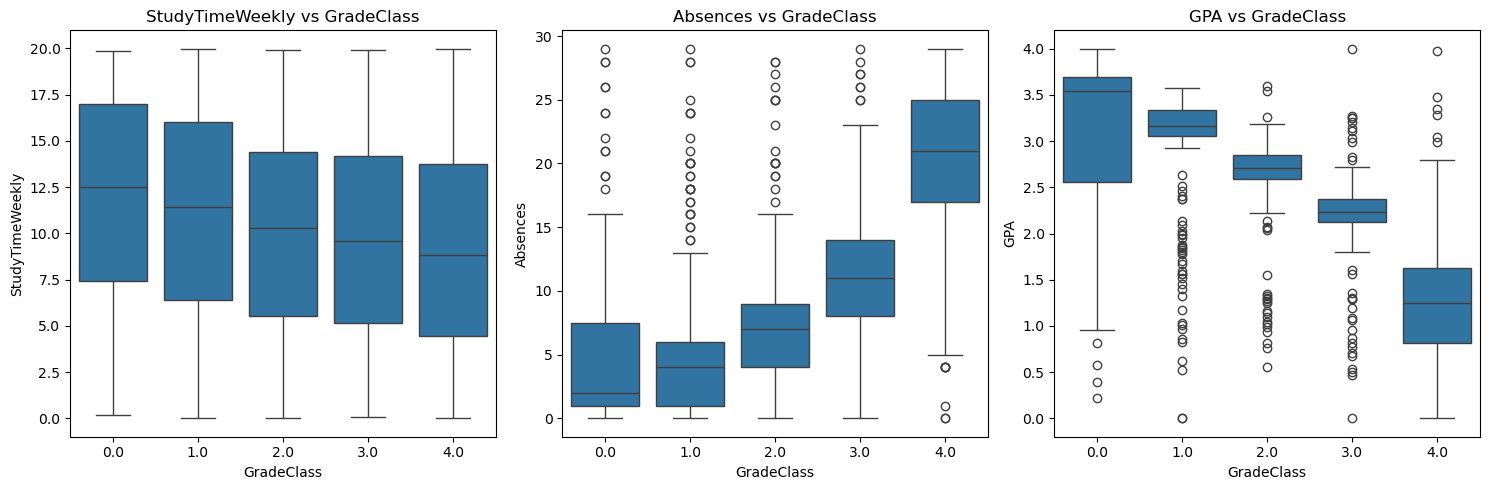

In [7]:
# Set up the figure and grid
n_features = len(numerical_vars)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten for easier iteration

# Create box plot for each numerical feature vs GradeClass
for i, var in enumerate(numerical_vars):
    sns.boxplot(x='GradeClass', y=var, data=data, ax=axes[i])
    axes[i].set_title(f'{var} vs GradeClass')
    axes[i].set_xlabel('GradeClass')
    axes[i].set_ylabel(var)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### - Catagorical Features vs GradeClass

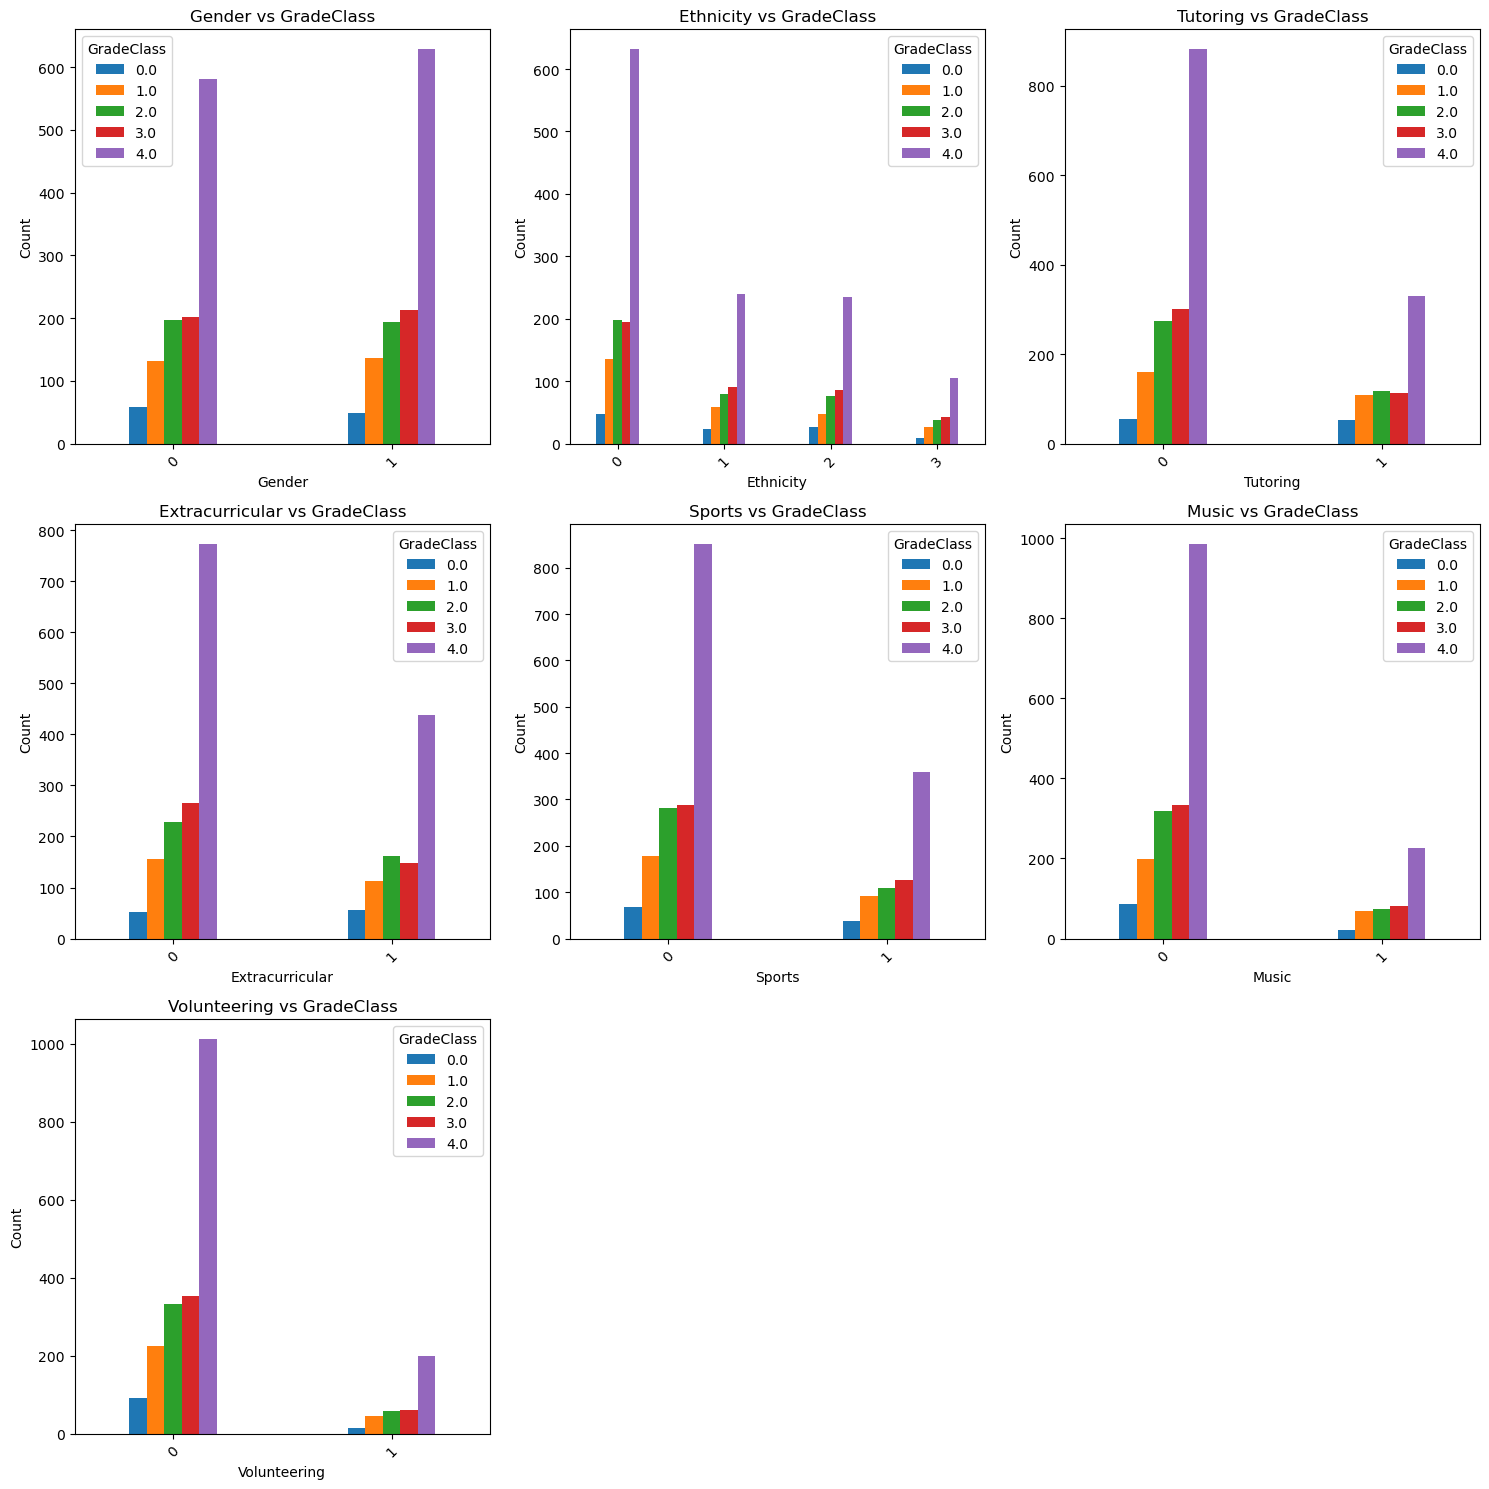

In [8]:
# Set up the figure and grid
n_features = len(categorical_vars)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten for easier iteration

# Create grouped bar plot for each categorical feature vs GradeClass
for i, var in enumerate(categorical_vars):
    # Create a cross-tabulation of counts
    crosstab = pd.crosstab(data[var], data['GradeClass'])
    # Plot grouped bar plot
    crosstab.plot(kind='bar', ax=axes[i], width=0.4)
    axes[i].set_title(f'{var} vs GradeClass')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='GradeClass')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### - Ordinal Features vs GradeClass

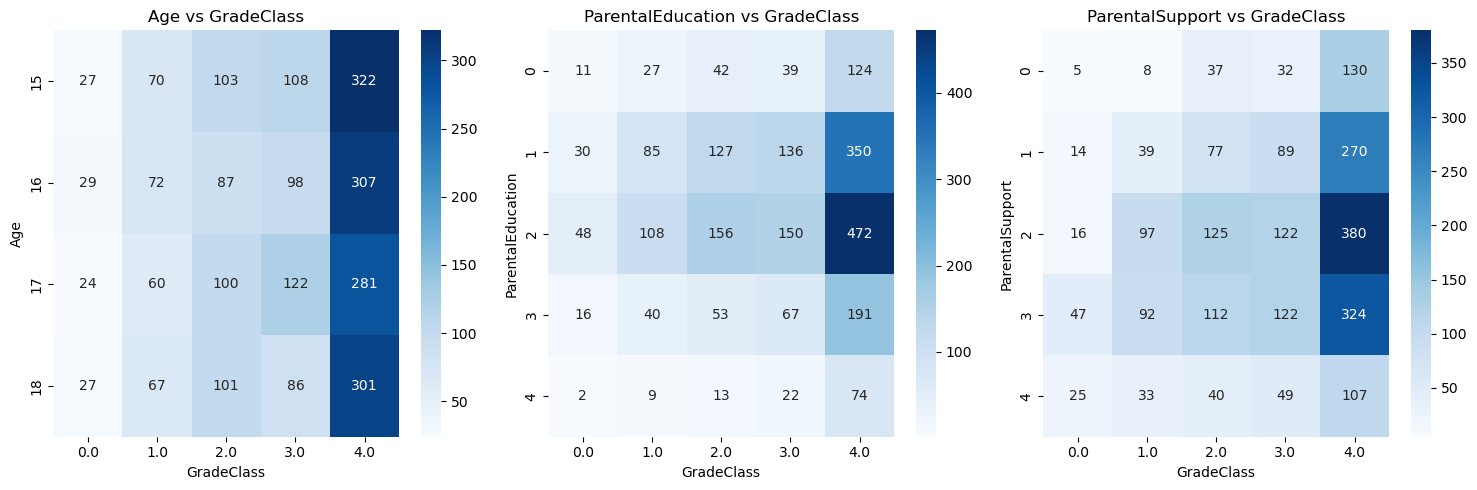

In [9]:
# Exclude GradeClass from ordinal variables for comparison
ordinal_vars_no_grade = [var for var in ordinal_vars if var != 'GradeClass']

# Set up the figure and grid
n_features = len(ordinal_vars_no_grade)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten for easier iteration

# Create heatmap for each ordinal feature vs GradeClass
for i, var in enumerate(ordinal_vars_no_grade):
    # Create a cross-tabulation of counts
    crosstab = pd.crosstab(data[var], data['GradeClass'])
    # Plot heatmap
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{var} vs GradeClass')
    axes[i].set_xlabel('GradeClass')
    axes[i].set_ylabel(var)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()